In [1]:
import numpy as np
import networkx as nx
import constants as ct

from general_utils import read_line_from_file, parse_lat_lon_alt
from planning_utils import rtt, create_grid, prune_path

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
def plot_final_grid(grid, nodes, edges, pruned_path, start, goal):
    fig = plt.figure(figsize=(20, 20))

    plt.imshow(grid, cmap='Greys', origin='lower')
    
    for idx in range(len(pruned_path) - 1):
       plt.plot([pruned_path[idx][1], pruned_path[idx + 1][1]], [pruned_path[idx][0], pruned_path[idx + 1][0]], 'blue' , alpha=0.5, linewidth=10)
    
    for edge in edges:
       plt.plot([edge[0][1], edge[1][1]], [edge[0][0], edge[1][0]], 'black' , alpha=0.5, linewidth=1)
    
    for point in nodes:
       plt.scatter(point[1], point[0], c='yellow', s=20)

    for point in pruned_path:
       plt.scatter(point[1], point[0], c='red', s=400)

    plt.scatter(start[1], start[0], c='blue', s=400)
    plt.scatter(goal[1], goal[0], c='blue', s=400)

    plt.xlabel('NORTH')
    plt.ylabel('EAST')

    plt.show()


In [3]:
print("Searching for a path ...")
TARGET_ALTITUDE = 5
SAFETY_DISTANCE = 5
source = (10, 700)
target = (800, 150)
delta = 10

# read lat0, lon0 from colliders into floating point values
lon0, lat0, alt0 = parse_lat_lon_alt(read_line_from_file(ct.COLLIDERS_FILE))
# Read in obstacle map
data = np.loadtxt(ct.COLLIDERS_FILE, delimiter=',', dtype='Float64', skiprows=2)

grid, north_offset, east_offset = create_grid(data, TARGET_ALTITUDE, SAFETY_DISTANCE)

nodes, edges = rtt(grid, source, target, delta)


Searching for a path ...
1
2
3
4
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
8
9
10
10
11
11
12
12
12
12
12
13
14
15
16
16
17
18
18
18
19
19
20
20
21
21
21
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
35
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
37
37
37
38
38
38
39
39
39
40
40
41
41
41
41
41
41
41
41
41
41
41
41
41
42
42
42
42
42
42
43
43
43
44
45
46
47
48
49

847
847
848
848
848
849
849
849
849
849
850
851
851
852
853
854
854
855
856
857
858
859
860
861
861
862
862
862
863
864
865
866
866
866
866
866
867
868
869
870
870
870
870
871
872
872
873
874
874
875
876
877
878
879
880
881
881
882
882
883
884
884
884
884
885
885
885
886
887
887
887
888
888
888
889
890
891
892
893
893
894
894
894
895
896
896
897
898
898
898
898
899
900
901
901
901
902
903
903
903
903
904
905
906
906
907
908
908
908
908
909
909
910
911
911
911
912
913
913
913
914
914
915
916
917
917
918
918
919
919
919
920
921
922
923
923
924
924
924
924
924
924
924
924
924
924
925
926
926
927
927
927
927
928
929
930
930
931
931
931
931
932
933
933
934
934
934
934
935
935
936
937
937
938
939
939
940
941
942
942
942
943
944
944
944
944
945
945
945
945
946
947
947
948
948
949
950
950
951
951
951
951
952
953
953
953
953
953
953
953
953
954
954
954
955
956
956
957
957
957
957
958
958
959
959
960
961
961
962
963
963
964
964
964
964
964
965
966
966
967
967
967
967
968
968
968
969
969
970
971


1710
1710
1710
1710
1711
1711
1711
1711
1712
1712
1712
1712
1712
1712
1712
1713
1713
1714
1715
1716
1717
1717
1717
1717
1718
1718
1718
1718
1719
1720
1721
1722
1723
1723
1724
1724
1725
1726
1726
1727
1727
1727
1727
1728
1728
1729
1730
1730
1730
1731
1731
1731
1732
1732
1732
1732
1733
1733
1734
1734
1734
1734
1734
1734
1735
1736
1736
1736
1737
1737
1738
1739
1740
1741
1742
1743
1743
1743
1744
1744
1744
1744
1745
1745
1746
1746
1747
1747
1748
1748
1748
1748
1748
1748
1749
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1759
1759
1759
1759
1760
1761
1761
1762
1763
1764
1765
1765
1766
1767
1767
1767
1767
1767
1768
1769
1769
1769
1769
1769
1769
1769
1770
1771
1771
1772
1773
1773
1773
1773
1774
1774
1775
1775
1776
1777
1777
1777
1777
1778
1779
1780
1780
1780
1781
1782
1783
1784
1785
1785
1785
1785
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1794
1794
1795
1796
1796
1796
1797
1798
1798
1799
1799
1799
1800
1800
1801
1801
1801
1802
1802
1802
1802
1803
1803
1804
1804
1804
1805
1806


2550
2550
2550
2551
2551
2551
2552
2553
2554
2555
2555
2556
2557
2557
2558
2558
2559
2559
2560
2561
2561
2562
2563
2563
2563
2564
2565
2565
2565
2566
2566
2566
2567
2568
2568
2568
2568
2569
2569
2569
2569
2570
2570
2571
2572
2573
2573
2573
2574
2574
2575
2575
2575
2575
2576
2577
2578
2579
2580
2580
2580
2581
2582
2583
2584
2584
2584
2585
2585
2586
2587
2587
2588
2589
2589
2590
2590
2590
2591
2592
2592
2593
2594
2594
2594
2594
2594
2594
2595
2596
2596
2597
2598
2598
2599
2599
2599
2600
2601
2602
2602
2603
2604
2604
2604
2604
2604
2605
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2614
2614
2615
2616
2617
2617
2617
2617
2618
2618
2618
2619
2619
2619
2620
2621
2621
2622
2623
2623
2623
2623
2623
2624
2625
2626
2627
2627
2628
2628
2629
2630
2630
2630
2630
2630
2630
2631
2631
2632
2633
2634
2635
2635
2635
2636
2637
2637
2638
2639
2639
2640
2641
2642
2642
2643
2643
2644
2645
2646
2646
2647
2648
2649
2649
2650
2650
2650
2650
2651
2652
2653
2653
2654
2655
2656
2656
2656
2657
2658
2658
2659


3521
3522
3522
3523
3524
3525
3526
3527
3528
3529
3529
3529
3529
3530
3531
3531
3531
3531
3532
3533
3534
3534
3535
3536
3537
3538
3539
3540
3541
3541
3542
3543
3543
3544
3544
3545
3546
3546
3546
3546
3547
3548
3549
3549
3550
3550
3550
3550
3551
3552
3553
3553
3554
3554
3555
3555
3556
3557
3558
3558
3559
3560
3561
3562
3563
3563
3564
3565
3565
3566
3567
3568
3568
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3577
3577
3578
3579
3579
3580
3580
3581
3581
3582
3582
3582
3583
3584
3584
3585
3586
3587
3588
3588
3589
3590
3591
3591
3591
3591
3592
3593
3594
3595
3595
3595
3596
3597
3597
3598
3599
3599
3600
3600
3600
3601
3602
3603
3604
3605
3605
3606
3607
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3619
3619
3620
3621
3621
3621
3621
3622
3622
3622
3622
3623
3624
3625
3626
3626
3627
3627
3628
3628
3628
3629
3630
3631
3632
3633
3633
3633
3633
3634
3635
3636
3637
3637
3637
3638
3639
3640
3641
3641
3642
3643
3643
3644
3645
3646
3646
3646
3646
3647
3647
3648
3649
3650
3651


4494
4495
4496
4497
4498
4498
4498
4498
4498
4498
4499
4500
4500
4501
4502
4502
4503
4504
4505
4506
4507
4507
4507
4508
4508
4509
4510
4511
4512
4512
4513
4514
4515
4515
4516
4516
4517
4517
4517
4518
4519
4520
4521
4521
4521
4521
4521
4522
4523
4524
4525
4525
4526
4527
4528
4529
4530
4530
4530
4530
4530
4531
4531
4531
4532
4533
4534
4535
4536
4536
4537
4538
4538
4538
4539
4540
4541
4542
4543
4544
4545
4545
4545
4545
4545
4546
4547
4547
4547
4548
4549
4550
4551
4551
4552
4552
4552
4552
4553
4553
4554
4554
4555
4556
4557
4558
4559
4560
4561
4562
4562
4563
4564
4564
4564
4564
4565
4566
4566
4567
4568
4568
4568
4568
4569
4569
4570
4571
4572
4573
4574
4575
4576
4577
4577
4577
4578
4578
4579
4580
4581
4581
4581
4581
4582
4583
4584
4584
4585
4585
4586
4587
4588
4588
4589
4590
4591
4591
4592
4593
4593
4594
4594
4595
4596
4596
4597
4598
4599
4599
4600
4600
4600
4601
4601
4602
4603
4603
4604
4605
4605
4606
4606
4606
4607
4607
4608
4608
4608
4609
4609
4609
4609
4609
4609
4610
4611
4611
4612
4613


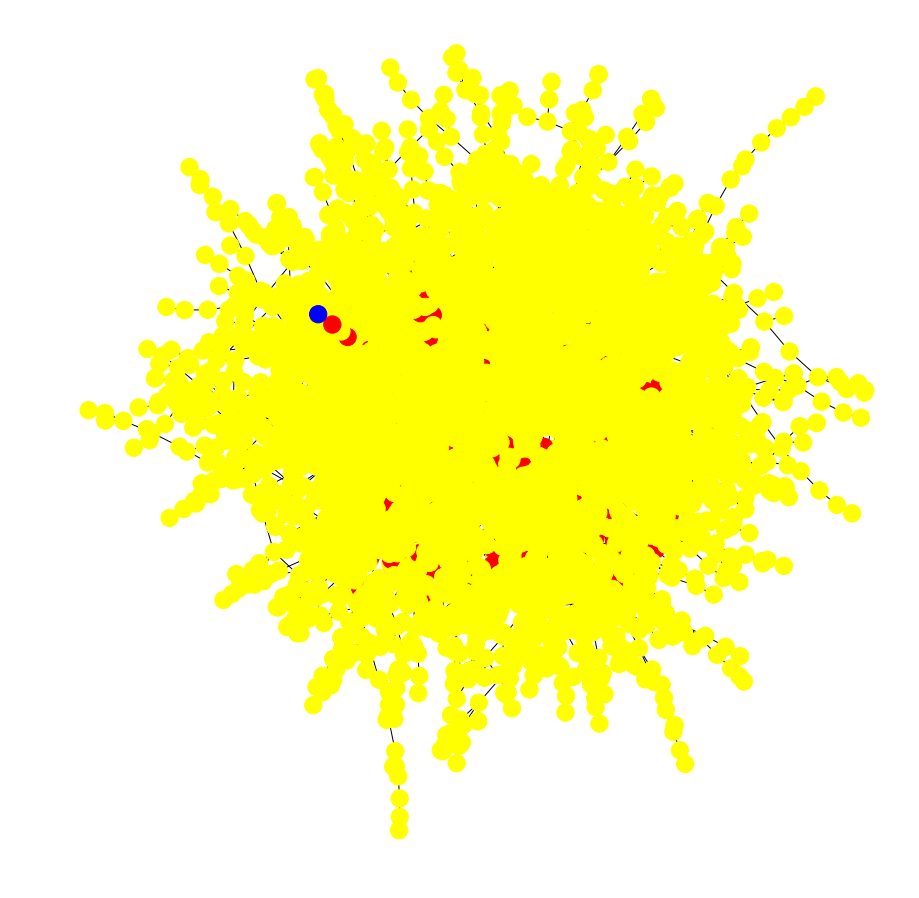

In [4]:
G = nx.Graph()
G.add_nodes_from([i for i in range(len(nodes))])
G.add_edges_from(edges)
source_index, target_index = 0, len(nodes) - 1

path_indices = nx.bidirectional_shortest_path(G, source_index, target_index)

color_map = []
for node_index in range(len(nodes)):
    node_color = "yellow"
    if node_index == source_index or node_index == target_index:
        node_color = "blue"
    elif node_index in path_indices:
        node_color = "red"
    color_map.append(node_color)

plt.figure(3,figsize=(12,12)) 
nx.draw(G, nx.spring_layout(G), node_color=color_map)
plt.show()

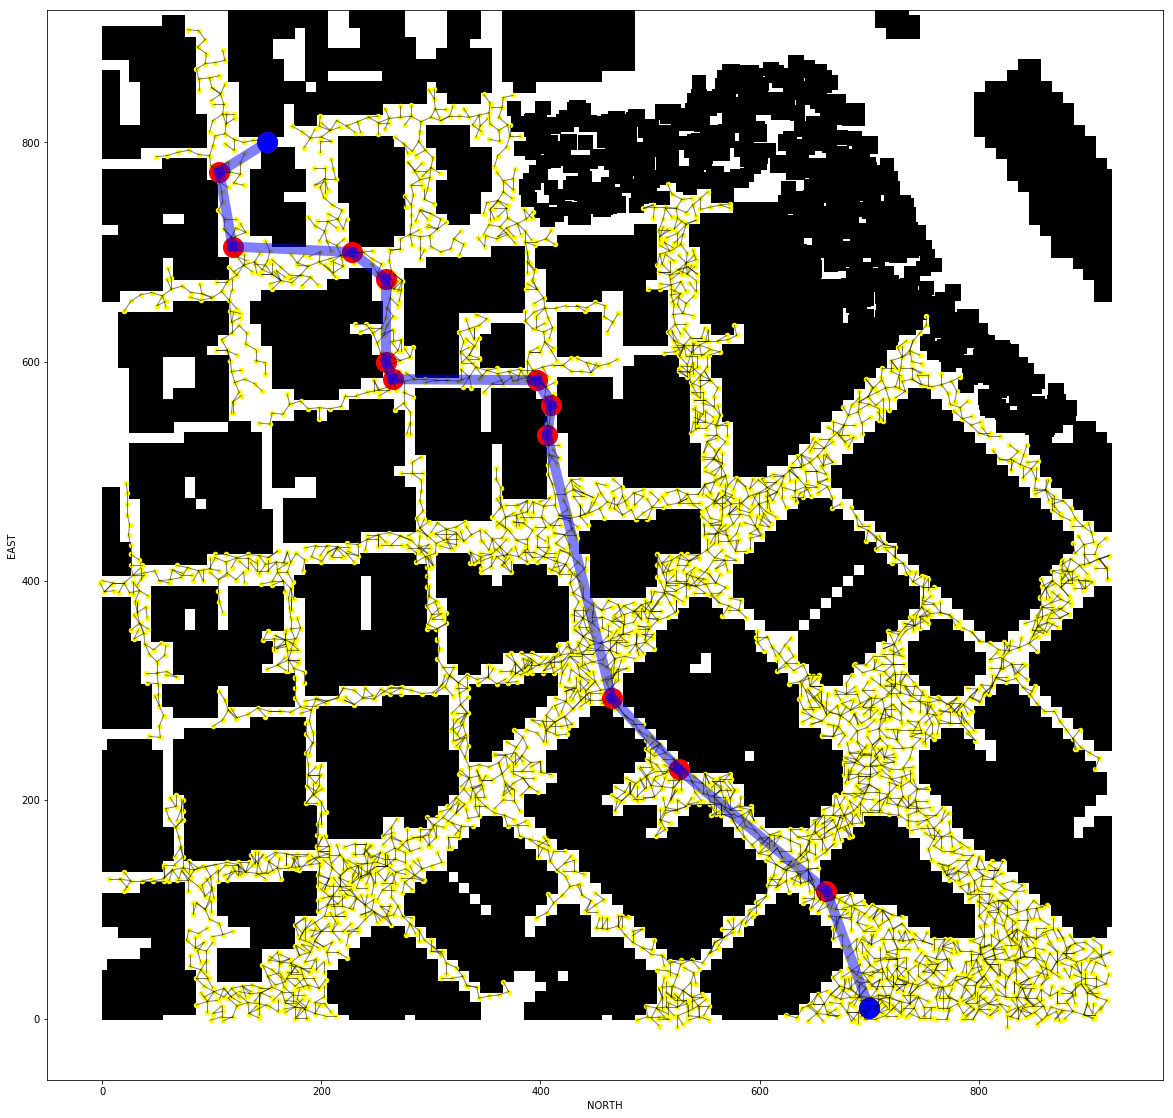

In [5]:
edges_with_coordinates = [(nodes[edge[0]], nodes[edge[1]]) for edge in edges]
path_with_coordinates = [nodes[path] for path in path_indices]
pruned_path = prune_path(path_with_coordinates, grid)
plot_final_grid(grid, nodes, edges_with_coordinates, pruned_path, source, target)